# MARKET BASKET ANALYSIS FOR E-COMMERCE

Importing major libraries on Python that will make us analyze the data

- numpy is for linear algebra(numerical python)
- panda is for data pre-processing. Python programming language for data manipulation
- seaborn is required for plotting. It is utilized for data exploration and visualization
- matplotlib is required for plotting. Allows programming to incoporate graphs

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# DATA PREPARATION

<b> Importing Dataset

In [2]:
df = pd.read_csv("Market Basket Analysis - Groceries_dataset.csv")
df.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


<b> Check the data type information for validation purposes (getting concise summary for the data frame)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


<b> To remove excess white space if any is present

In [4]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

<b> Perform a type conversion from object to data type

In [5]:
df['date'] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


C:\Users\victory.joseph\AppData\Local\Temp\ipykernel_2084\3983532214.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df["Date"])


<b> Check availability of null values

In [6]:
df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
date               0
dtype: int64

<b> Check for duplicate rows

In [8]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
print(f'number of duplicate entries {df.duplicated().sum()}, duplicate entries in percent {round(df.duplicated().sum()/len(df)*100,2)}%\n')

       Member_number        Date   itemDescription       date
5015            2051  11-09-2015       frankfurter 2015-09-11
5022            3055  18-08-2015  other vegetables 2015-08-18
5044            1994  11-03-2015        whole milk 2015-03-11
5055            1682  25-06-2015         pip fruit 2015-06-25
5059            4324  05-01-2015           sausage 2015-01-05
...              ...         ...               ...        ...
38614           2027  26-02-2014     domestic eggs 2014-02-26
38684           2936  07-03-2014        newspapers 2014-03-07
38685           2311  13-03-2014        pot plants 2014-03-13
38722           3834  18-05-2014       salty snack 2014-05-18
38723           1146  23-05-2014            yogurt 2014-05-23

[759 rows x 4 columns]
number of duplicate entries 759, duplicate entries in percent 1.96%



<b> Remove duplicates from the original data frame

In [9]:
df = df.drop_duplicates()

<b> Check again for duplicates

In [10]:
print(df.duplicated().sum())

0


<b> Schema Check

In [11]:
df.head(10)

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-01-05
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-02-01
5,4941,14-02-2015,rolls/buns,2015-02-14
6,4501,08-05-2015,other vegetables,2015-05-08
7,3803,23-12-2015,pot plants,2015-12-23
8,2762,20-03-2015,whole milk,2015-03-20
9,4119,12-02-2015,tropical fruit,2015-02-12


## EXPLORATORY DATA ANALYSIS(EDA)

Exploratory data analysis (EDA) is used to analyze and investigate a data sets and summarize their main characteristics, often employing data visualization methods. 

<b> Create distribution of Top 10 Item sold

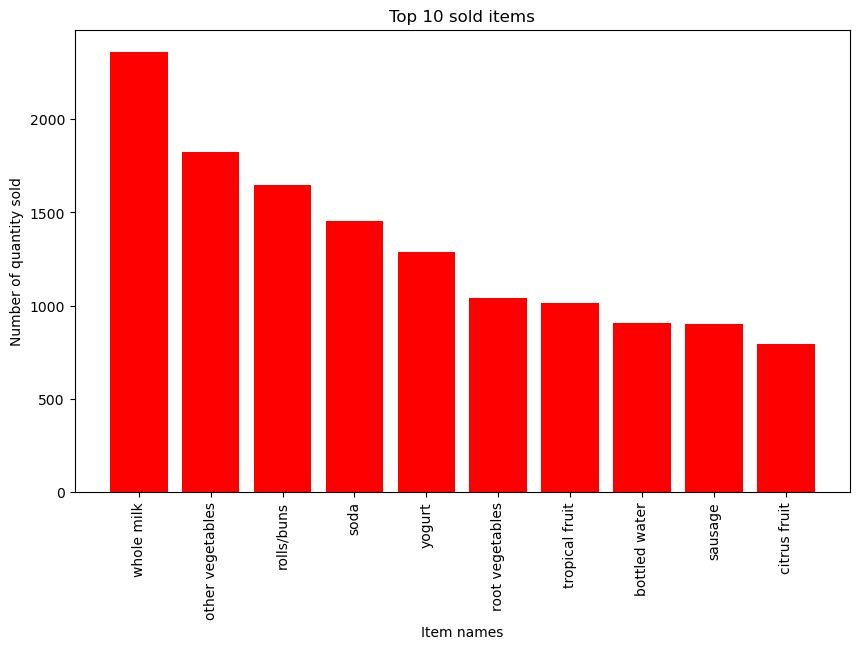

In [23]:
Item_distr = df.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency', ascending=False).head(10)

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

plt.figure(figsize=(10, 6))

plt.bar(x_pos, height, color='red')

plt.title("Top 10 sold items")
plt.xlabel("Item names")
plt.ylabel('Number of quantity sold')

plt.xticks(x_pos, bars, rotation='vertical')

plt.show()


<b> Set date as index plotting purpose

In [13]:
df_date = df.set_index(['Date'])
df_date

,Member_number,itemDescription,date
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-01-05
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-02-01
...,...,...,...
08-10-2014,4471,sliced cheese,2014-10-08
23-02-2014,2022,candy,2014-02-23
16-04-2014,1097,cake bar,2014-04-16


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

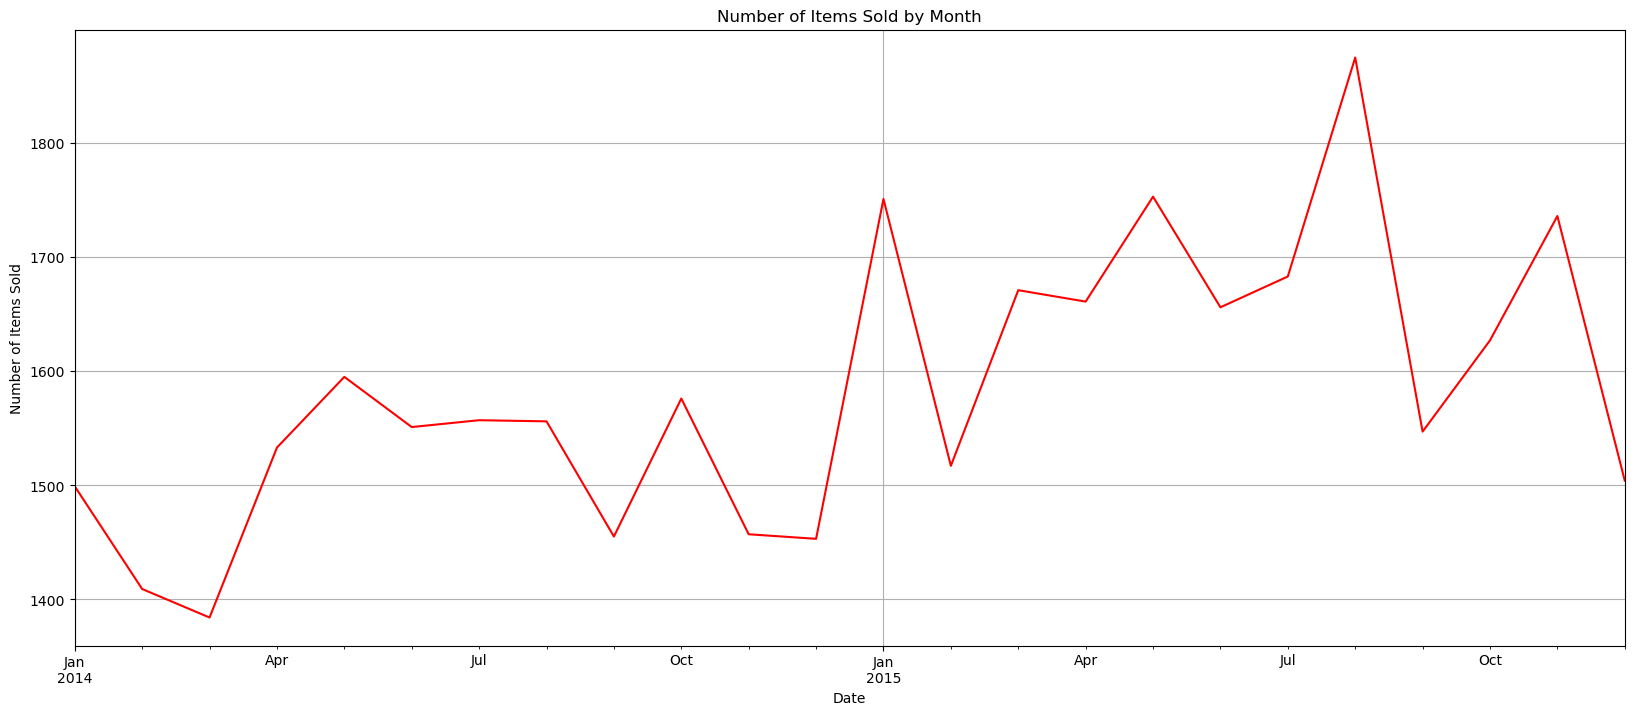

In [22]:
df_date.index = pd.to_datetime(df_date.index)
df_date.resample("M")["itemDescription"].count().plot(
    figsize=(20, 8),
    grid=True,
    title='Number of Items Sold by Month',
    color='red'
).set(xlabel="Date", ylabel="Number of Items Sold")


## MARKET BASKET ANALYSIS (MBA)

Market Basket Analysis 
This is a data mining approach utilized by retailers to boost sales by having a better understanding of client buying patterns. With this, 

Market Basket Analysis (MBA) is a data analysis technique commonly used in the field of e-commerce to uncover associations between products that customers tend to purchase together. The idea behind MBA is to examine historical transaction data and identify patterns or relationships between different items frequently bought in the same transaction. MBA aims to understand customer behavior and preferences, ultimately helping businesses make informed decisions about product placement, promotions, and inventory management.

<b> Key concepts in Market Basket Analysis:
- Association Rules: These are statements that indicate the likelihood of one product being purchased when another is. For example, an association rule might reveal that customers who buy a digital camera are also likely to purchase memory cards.
- Support: This measures the frequency with which a particular combination of items appears in the dataset. It is the proportion of transactions that contain the items in question.
- Confidence: This indicates the likelihood that if item A is purchased, item B will also be purchased. It is the ratio of the number of transactions where A and B are bought together to the number of transactions where A is bought.
- Lift: Lift measures how much more likely item B is to be bought when item A is bought compared to when item B is bought without item A. A lift greater than 1 indicates a positive association.

In [18]:
basket = (df.groupby(['Member_number', 'Date', 'itemDescription'])
          .size().unstack().reset_index().fillna(0)
          .set_index(['Member_number', 'Date']))
basket

itemDescription           Instant food products  UHT-milk  abrasive cleaner  \
Member_number Date                                                            
1000          15-03-2015                    0.0       0.0               0.0   
              24-06-2014                    0.0       0.0               0.0   
              24-07-2015                    0.0       0.0               0.0   
              25-11-2015                    0.0       0.0               0.0   
              27-05-2015                    0.0       0.0               0.0   
...                                         ...       ...               ...   
4999          24-01-2015                    0.0       0.0               0.0   
              26-12-2015                    0.0       0.0               0.0   
5000          09-03-2014                    0.0       0.0               0.0   
              10-02-2015                    0.0       0.0               0.0   
              16-11-2014                    0.0       0.0               0.0   

itemDescription           artif. sweetener  baby cosmetics  bags  \
Member_number Date                                                 
1000          15-03-2015               0.0             0.0   0.0   
              24-06-2014               0.0             0.0   0.0   
              24-07-2015               0.0             0.0   0.0   
              25-11-2015               0.0             0.0   0.0   
              27-05-2015               0.0             0.0   0.0   
...                                    ...             ...   ...   
4999          24-01-2015               0.0             0.0   0.0   
              26-12-2015               0.0             0.0   0.0   
5000          09-03-2014               0.0             0.0   0.0   
              10-02-2015               0.0             0.0   0.0   
              16-11-2014               0.0             0.0   0.0   

itemDescription           baking powder  bathroom cleaner  beef  berries  ...  \
Member_number Date                                                        ...   
1000          15-03-2015            0.0               0.0   0.0      0.0  ...   
              24-06-2014            0.0               0.0   0.0      0.0  ...   
              24-07-2015            0.0               0.0   0.0      0.0  ...   
              25-11-2015            0.0               0.0   0.0      0.0  ...   
              27-05-2015            0.0               0.0   0.0      0.0  ...   
...                                 ...               ...   ...      ...  ...   
4999          24-01-2015            0.0               0.0   0.0      1.0  ...   
              26-12-2015            0.0               0.0   0.0      0.0  ...   
5000          09-03-2014            0.0               0.0   0.0      0.0  ...   
              10-02-2015            0.0               0.0   0.0      0.0  ...   
              16-11-2014            0.0               0.0   0.0      0.0  ...   

itemDescription           turkey  vinegar  waffles  whipped/sour cream  \
Member_number Date                                                       
1000          15-03-2015     0.0      0.0      0.0                 0.0   
              24-06-2014     0.0      0.0      0.0                 0.0   
              24-07-2015     0.0      0.0      0.0                 0.0   
              25-11-2015     0.0      0.0      0.0                 0.0   
              27-05-2015     0.0      0.0      0.0                 0.0   
...                          ...      ...      ...                 ...   
4999          24-01-2015     0.0      0.0      0.0                 0.0   
              26-12-2015     0.0      0.0      0.0                 0.0   
5000          09-03-2014     0.0      0.0      0.0                 0.0   
              10-02-2015     0.0      0.0      0.0                 0.0   
              16-11-2014     0.0      0.0      0.0                 0.0   

itemDescription           whisky  white bread  white wine  whole milk 

<b> Convert the item counts to binary values (1 or 0)

In [19]:
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)
basket_sets

itemDescription           Instant food products  UHT-milk  abrasive cleaner  \
Member_number Date                                                            
1000          15-03-2015                      0         0                 0   
              24-06-2014                      0         0                 0   
              24-07-2015                      0         0                 0   
              25-11-2015                      0         0                 0   
              27-05-2015                      0         0                 0   
...                                         ...       ...               ...   
4999          24-01-2015                      0         0                 0   
              26-12-2015                      0         0                 0   
5000          09-03-2014                      0         0                 0   
              10-02-2015                      0         0                 0   
              16-11-2014                      0         0                 0   

itemDescription           artif. sweetener  baby cosmetics  bags  \
Member_number Date                                                 
1000          15-03-2015                 0               0     0   
              24-06-2014                 0               0     0   
              24-07-2015                 0               0     0   
              25-11-2015                 0               0     0   
              27-05-2015                 0               0     0   
...                                    ...             ...   ...   
4999          24-01-2015                 0               0     0   
              26-12-2015                 0               0     0   
5000          09-03-2014                 0               0     0   
              10-02-2015                 0               0     0   
              16-11-2014                 0               0     0   

itemDescription           baking powder  bathroom cleaner  beef  berries  ...  \
Member_number Date                                                        ...   
1000          15-03-2015              0                 0     0        0  ...   
              24-06-2014              0                 0     0        0  ...   
              24-07-2015              0                 0     0        0  ...   
              25-11-2015              0                 0     0        0  ...   
              27-05-2015              0                 0     0        0  ...   
...                                 ...               ...   ...      ...  ...   
4999          24-01-2015              0                 0     0        1  ...   
              26-12-2015              0                 0     0        0  ...   
5000          09-03-2014              0                 0     0        0  ...   
              10-02-2015              0                 0     0        0  ...   
              16-11-2014              0                 0     0        0  ...   

itemDescription           turkey  vinegar  waffles  whipped/sour cream  \
Member_number Date                                                       
1000          15-03-2015       0        0        0                   0   
              24-06-2014       0        0        0                   0   
              24-07-2015       0        0        0                   0   
              25-11-2015       0        0        0                   0   
              27-05-2015       0        0        0                   0   
...                          ...      ...      ...                 ...   
4999          24-01-2015       0        0        0                   0   
              26-12-2015       0        0        0                   0   
5000          09-03-2014       0        0        0                   0   
              10-02-2015       0        0        0                   0   
              16-11-2014       0        0        0                   0   

itemDescription           whisky  white bread  white wine  whole milk 

<b> Generating and displaying frequent itemsets using Apriori and Association rule

<b> Association rules generated from association rule mining. Each row represents a rule with the following columns:

- Rule ID (e.g., 12): An identifier for the rule.
- Antecedent (left-hand side): The items or itemsets that are present in the antecedent part of the rule.
- Consequent (right-hand side): The items or itemsets that are present in the consequent part of the rule.
- Antecedent Support: The proportion of transactions in the dataset that contain the antecedent.
- Consequent Support: The proportion of transactions in the dataset that contain the consequent.
- Support: The proportion of transactions that contain both the antecedent and the consequent.
- Confidence: The conditional probability of the consequent given the antecedent.
- Lift: A measure of how much more likely the consequent is given the antecedent, compared to its likelihood without the antecedent.
- Leverage: The difference between the observed frequency of the antecedent and consequent occurring together and the frequency expected if they were independent.
- Conviction: The ratio of the expected frequency that the antecedent and consequent occur together to the observed frequency of the antecedent and not the consequent.

In [21]:
frequent_itemsets = apriori(basket_sets, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules.sort_values(by='zhangs_metric', ascending=False).head(10)

C:\Users\victory.joseph\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
12,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
59,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
58,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
55,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
54,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
56,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
57,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


<b> ZHANG'S METRIC
    
Zhang's metric, also known as Zhang's rule interestingness measure, is one of the measures used in association rule mining to evaluate the interestingness or significance of association rules.

Zhang's metric aims to discover interesting association rules from customer behavior data." The metric aims to capture the unusualness or novelty of a rule beyond what would be expected by chance

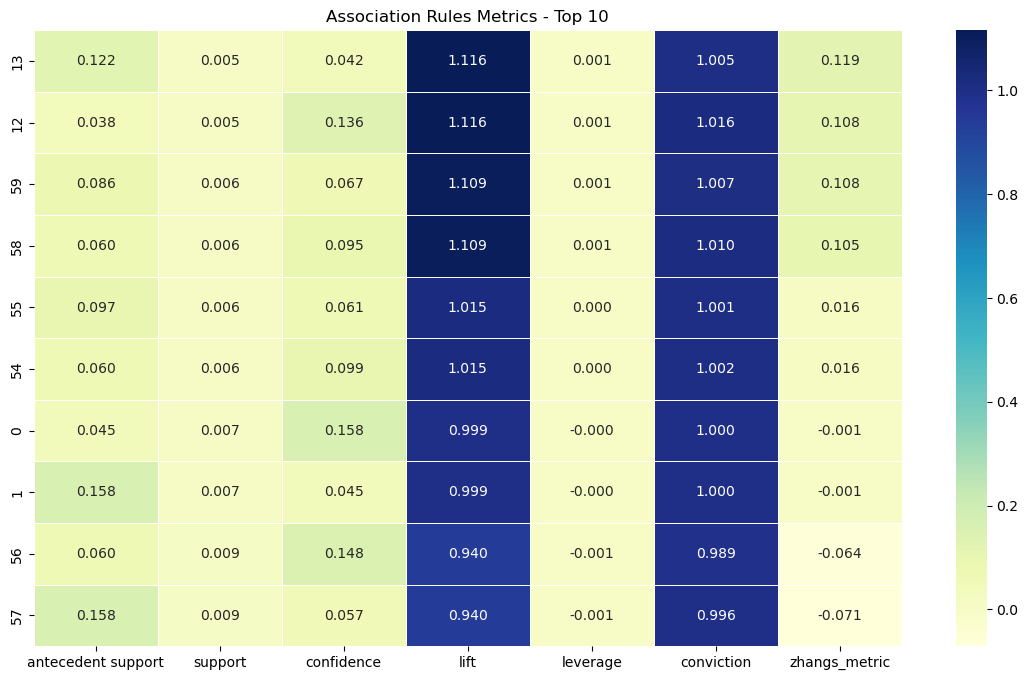

In [27]:
rules_with_zhang = rules.dropna(subset=['zhangs_metric'])
top_rules = rules_with_zhang.nlargest(10, 'zhangs_metric')
heatmap_data = top_rules[['antecedent support', 'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']]
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='.3f', linewidths=.5)

plt.title('Association Rules Metrics - Top 10')
plt.show()


<b> Pairing strong dependency indication of  zhangs metric in a separate dataframe

In [31]:
depen_con = rules[rules['conviction'] >= 1]

depen_con.head()
     

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
13,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
54,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
55,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
58,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587


## INTERPRETATION AND INSIGHTS

<b> SPECIFIC OBSERVATIONS:
 
- Rule 12: There is a rule indicating that when "other vegetables" are present, there is a 1.116150 times increase in the likelihood of "frankfurter" being present in the same transaction. The lift value is greater than 1, suggesting a positive association.

    
    
- Rule 13: Similarly, when "frankfurter" is present, there is a 1.116150 times increase in the likelihood of "other vegetables" being present. Again, the lift is greater than 1, indicating a positive association.

 
    
- Rule 54: This rule involves the presence of "sausage" leading to a 1.014975 times increase in the likelihood of "soda" being present. The lift is close to 1, suggesting a weak positive association.

  
    
- Rule 55: Conversely, when "soda" is present, there is a 1.014975 times increase in the likelihood of "sausage" being present. The lift is close to 1, indicating a weak positive association.

    
    
- Rule 58: The presence of "sausage" leads to a 1.108986 times increase in the likelihood of "yogurt" being present. The lift is greater than 1, indicating a positive association.

<b> RECOMMENDATIONS:
    
<b> Cross-Promotion of "Other Vegetables" and "Frankfurter":

Given the positive association between "other vegetables" and "frankfurter" (Rule 12 and Rule 13), consider cross-promoting these items. For example, you might place "frankfurter" products near the "other vegetables" section, or create promotional bundles that include both items.

<b> Association between "Sausage" and "Soda":

There is a weak positive association between "sausage" and "soda" (Rule 54 and Rule 55). While the association is not very strong, it might be worth exploring promotional strategies or product placements that leverage this connection. For instance, consider placing "soda" near the "sausage" section or creating combo deals.

<b> Promoting "Sausage" and "Yogurt" Together:

The presence of "sausage" seems to increase the likelihood of "yogurt" (Rule 58). This suggests that customers who buy sausage might also be interested in yogurt. Consider creating promotions or displays that encourage the purchase of these items together.